# Fragestellung

Werden die Formulierungen der ZDF-Heute Nachrichten, die in Fußballpausen laufen, leichter formuliert?

Nimmt das Niveau des Ausdrucks der ZDF-Heute Nachrichten in Sendungen, die in Fußballpausen laufen ab?


# Methode

Zur Beantwortung der Frage werden zunächst Youtubevideos der letzten Monate gescraped und anschließend mittels Lesbarkeitsmessungen ála Flesch automatisiert gelabelled. 



Siehe:

Karl-Heinz Best: Sind Wort- und Satzlänge brauchbare Kriterien der Lesbarkeit von Texten? In: Sigurd Wichter, Albert Busch (Hrsg.): Wissenstransfer: Erfolgskontrolle und Rückmeldungen aus der Praxis. P. Lang, Frankfurt am Main 2006, ISBN 978-3-631-53671-1, S. 21–31. 


# Analyse


In [ ]:
#pip install pandas matplotlib textstat scipy seaborn

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import textstat 
from scipy import stats
import seaborn as sns
import re

In [154]:
df = pd.read_csv('data/data.csv')

if 'ID' not in df.columns:
    df['ID'] = range(1, len(df) + 1)

In [162]:
def extract_date(title):
    date_pattern = re.compile(r'\b\d{1,2}\.\d{1,2}\.\d{2,4}\b')
    match = date_pattern.search(title)
    return match.group(0) if match else None
    
def convert_date(date_str):
    for fmt in ('%d.%m.%Y', '%d.%m.%y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return None

df['date'] = df['title'].apply(extract_date)
df['date'] = df['date'].apply(convert_date)

In [163]:
language_map = {
    'english': 'en_US',
    'deutsch': 'de'
}

def calculate_flesch_score(text, language):
    mapped_language = language_map.get(language)
    if mapped_language in ['en_US', 'de']:
        textstat.set_lang(mapped_language)
        return textstat.flesch_reading_ease(text)
    else:
        print(f"Unsupported language: {language}")
        return None


In [164]:
# Calculate the Flesch Reading Ease Score
df['flesch'] = df.apply(lambda row: calculate_flesch_score(row['text'], row['language']), axis=1)

In [165]:
df

,ID,url,path,text,title,date,language,flesch
0,1,https://www.youtube.com/watch?v=cZSi8H7fXg4,audio/1_heute_nachrichten.mp3,. . . . Guten Abend und willkommen zu einem k...,"heute 19:00 Uhr vom 25.06.2024 Julian Assange,...",2024-06-25,english,68.57
1,2,https://www.youtube.com/watch?v=kdANgOrJJ_E,audio/2_heute_nachrichten.mp3,Die Nachrichten des Tages. Heute mit Barbara ...,heute 19:00 Uhr 24.6.24 Neuer Anlauf Organspen...,2024-06-24,english,69.48
2,3,https://www.youtube.com/watch?v=-nwfC3gosXI,audio/3_heute_nachrichten.mp3,Die Nachrichten des Tages heute mit Barbara H...,"heute 19 Uhr 23.06.24 Milei bei Scholz, Merz a...",2024-06-23,english,78.75
3,4,https://www.youtube.com/watch?v=Ca7LEdnyjig,audio/4_heute_nachrichten.mp3,Guten Abend Ihnen allen. Wir nutzen die Halbz...,heute 19 Uhr 22.06.24 Habeck vermittelt bei EU...,2024-06-22,english,66.84
4,5,https://www.youtube.com/watch?v=J70RdZqYvHo,audio/5_heute_nachrichten.mp3,"Und jetzt, das heute schonal. Mit Heinz 12 un...","heute journal 21.06.24 Innenministerkonferenz,...",2024-06-21,english,66.54
5,6,https://www.youtube.com/watch?v=Qvq9FB2p5AI,audio/6_heute_nachrichten.mp3,Die Nachrichten des Tages. Heute mit Barbara ...,"heute 19 Uhr vom 21.06.24 Habecks China Reise,...",2024-06-21,english,77.03
6,7,https://www.youtube.com/watch?v=C4R9MeSsWqA,audio/7_heute_nachrichten.mp3,Und jetzt das heute Journal. Guten Abend. Die...,heute journal 20.06.24 Ministerpräsidenten tre...,2024-06-20,english,75.50
7,8,https://www.youtube.com/watch?v=lpYeW2fdNIQ,audio/8_heute_nachrichten.mp3,Guten Abend Ihnen allen zu einem kurzen Nachr...,heute 19:00 Uhr vom 20.06.24 Beratung über Asy...,2024-06-20,english,66.64
8,9,https://www.youtube.com/watch?v=-TYr7P8Uk30,audio/9_heute_nachrichten.mp3,ZRF heute live herzlich willkommen zu unserem...,Gleitbomben und Drohnenangriffe: Hohe Verluste...,NaT,deutsch,61.15
9,11,https://www.youtube.com/watch?v=aAVkmYXP-YA,audio/11_heute_nachrichten.mp3,Die Nachrichten des Tages. Heute mit Jana Par...,"heute 19:00 Uhr 19.6.24 Rücktritt Dreyer, Bera...",2024-06-19,english,68.67


Video 17 ist wurde am 14. Juni gesendet, Video 18 am 13. Juni. 

Die EM startete am 14. Juni, daher wird erwartet, dass die Videos mit einer "ID <= 17" leichter Verständlich sind

| Score  | Difficulty        |
|--------|-------------------|
| 90-100 |  Very Easy        |
| 80-89  | 	Easy             |
| 70-79  | 	Fairly Easy      |
| 60-69  | 	Standard         |
| 50-59  | 	Fairly Difficult |
| 30-49  | 	Difficult        |
| 0-29   | 	Very Confusing   |

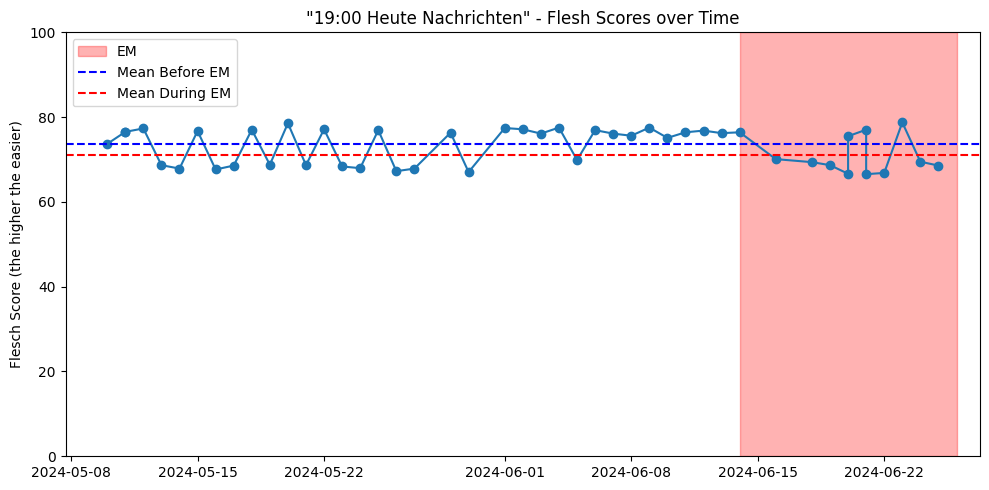

In [166]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

mean_before_em = df[df['date'] < pd.to_datetime("2024-06-14")]['flesch'].mean()
mean_during_em = df[(df['date'] >= pd.to_datetime("2024-06-14")) & (df['date'] <= pd.to_datetime("2024-06-26"))]['flesch'].mean()


plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['flesch'], marker='o')
plt.axvspan(pd.to_datetime("2024-06-14"), pd.to_datetime("2024-06-26"), color='red', alpha=0.3, label='EM')
plt.axhline(y=mean_before_em, color='blue', linestyle='--', label='Mean Before EM')
plt.axhline(y=mean_during_em, color='red', linestyle='--', label='Mean During EM')
plt.ylabel('Flesch Score (the higher the easier)')
plt.title('"19:00 Heute Nachrichten" - Flesh Scores over Time')
plt.grid(False)
plt.ylim(0, 100)
plt.tight_layout()
plt.legend()

plt.show()

## T-Test

In [167]:
before_em = df[df['date'] < pd.to_datetime("2024-06-14")]['flesch']
during_em = df[(df['date'] >= pd.to_datetime("2024-06-14")) & (df['date'] <= pd.to_datetime("2024-06-26"))]['flesch']

t_stat, p_value = stats.ttest_ind(before_em, during_em)

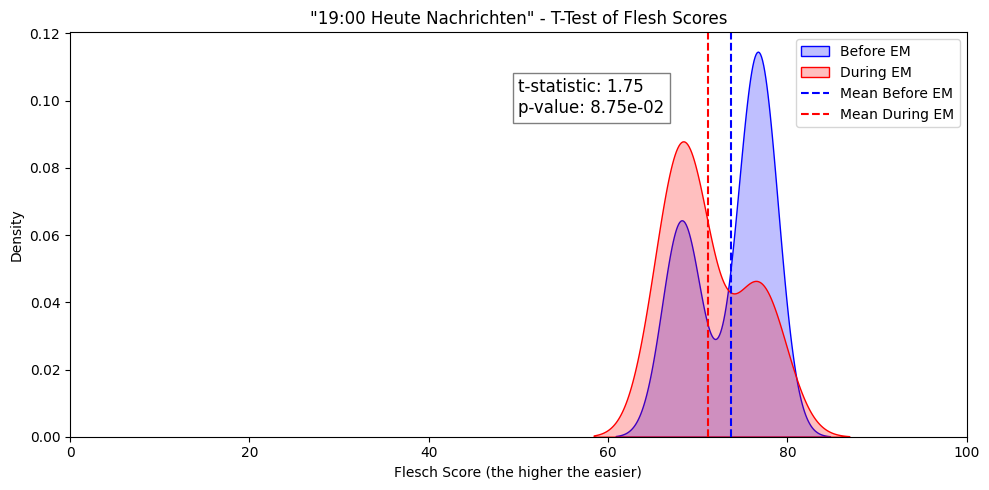

In [168]:
plt.figure(figsize=(10, 5))
sns.kdeplot(before_em, label='Before EM', color='blue', fill=True)
sns.kdeplot(during_em, label='During EM', color='red', fill=True)
plt.axvline(before_em.mean(), color='blue', linestyle='--', label='Mean Before EM')
plt.axvline(during_em.mean(), color='red', linestyle='--', label='Mean During EM')

plt.annotate(f't-statistic: {t_stat:.2f}\np-value: {p_value:.2e}', 
             xy=(0.5, 0.8), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.5))
plt.xlim(0, 100)

plt.xlabel('Flesch Score (the higher the easier)')
plt.ylabel('Density')
plt.title('"19:00 Heute Nachrichten" - T-Test of Flesh Scores')
plt.grid(False)

plt.legend()
plt.tight_layout()

plt.show()

Bisher waren auch die englischen Videos dabei... jetzt mal nur mit dem kleinen subset der deutschen news

In [169]:
ger_df = df[df['language'] == 'deutsch']

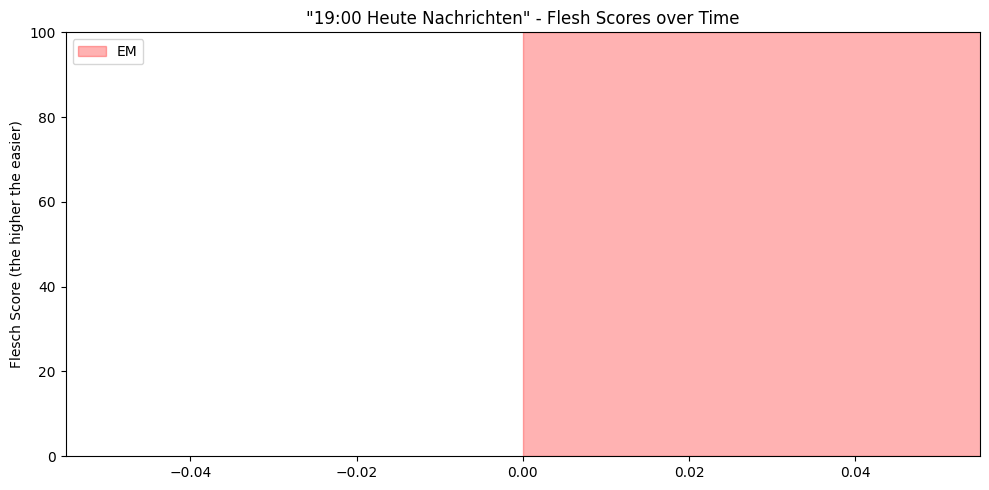

In [170]:
#ger_mean_before_em = ger_df[ger_df['ID'] < 17]['flesch'].mean()
#ger_mean_during_em = ger_df[ger_df['ID'] >= 17]['flesch'].mean()


plt.figure(figsize=(10, 5))
plt.plot(ger_df['ID'], ger_df['flesch'], marker='o')
plt.axvspan(0, 17, color='red', alpha=0.3, label='EM')
#plt.axhline(y=ger_mean_before_em, color='blue', linestyle='--', label='Mean Before EM')
#plt.axhline(y=ger_mean_during_em, color='red', linestyle='--', label='Mean During EM')
plt.ylabel('Flesch Score (the higher the easier)')
plt.title('"19:00 Heute Nachrichten" - Flesh Scores over Time')
plt.grid(False)
plt.ylim(0, 100)
plt.tight_layout()
plt.legend()

plt.show()